In [1]:
# import basic packages
%run SetUp.ipynb

Configuration.

In [2]:
## Configuration
Title = "Fig_LevelCurve"
device = 'cpu' # "cuda:1" if torch.cuda.is_available() else "cpu"

# create directory
output_path = f"./Results/{Title}"
create_directory(output_path)

# data setting 
n=5 # number of data 
d=2 # dimension of data

# input X is shape of n x d 
X = torch.tensor([[0.8858, 0.0244],
        [0.4338, 0.8852],
        [0.6739, 0.0399],
        [0.0221, 0.4778],
        [0.2322, 0.8717]]).to(device)
# label Y is shape of n x 1
Y = torch.tensor([[0.6111],
        [0.9397],
        [1.8694],
        [2.7104],
        [1.3089]]).to(device)

# Random data
# X = torch.rand(n,d)
# Y = torch.rand(n,1) + 2 * torch.max(torch.randn(n,1), torch.zeros(n,1))
# H = X.t().matmul(X) # The Hessian Matirx
# q = (X * Y).sum(0)

# U, D, _ = torch.svd(H) # eigenvector decompsition of H
# print("eigenvalues of H =", D)
# w_star = torch.linalg.inv(H).matmul(q) # the global minimum of the linear network
# w_star_cpu = w_star.cpu()
# zero = np.array([0,0,0.])
# print("w* =", w_star)

Single-Layer Linear and ReLU Networks

In [3]:
relu_net = ReLU_Net()
relu_net.module[0].weight = nn.Parameter(0.0001 * torch.rand(1,d)) 
relu_net.to(device)
relu_net2 = ReLU_Net()
relu_net2.module[0].weight = nn.Parameter(torch.tensor([[0., 8.]])) 
relu_net2.to(device)
relu_net3 = ReLU_Net()
relu_net3.module[0].weight = nn.Parameter(torch.tensor([[0., 45]])) 
relu_net3.to(device)

# optimization Setting
lr = 0.005
criterion = nn.MSELoss()
relu_optimizer = optim.SGD(relu_net.parameters(), lr=lr)
relu_optimizer2 = optim.SGD(relu_net2.parameters(), lr=lr)
relu_optimizer3 = optim.SGD(relu_net3.parameters(), lr=lr)

In [4]:
relu_tr = np.empty((0,d)) # Gradient flow tracing
relu_tr2 = np.empty((0,d)) 
relu_tr3 = np.empty((0,d)) 
relu_loss_tr = np.empty(0) # Loss 
relu_loss_tr2 = np.empty(0) 
relu_loss_tr3 = np.empty(0) 

Epochs = 1000*200
log_period = 10
for epoch in range(Epochs) :
    relu_loss = criterion(relu_net(X), Y)
    relu_loss.backward()
    relu_optimizer.step()
    relu_net.zero_grad()
    
    relu_loss2 = criterion(relu_net2(X), Y)
    relu_loss2.backward()
    relu_optimizer2.step()
    relu_net2.zero_grad()
    
    relu_loss3 = criterion(relu_net3(X), Y)
    relu_loss3.backward()
    relu_optimizer3.step()
    relu_net3.zero_grad()

    if epoch % log_period == 0 :
        relu_tr = np.append(relu_tr, relu_net.weight(), axis=0)
        relu_loss_tr = np.append(relu_loss_tr, relu_loss.item())
        relu_tr2 = np.append(relu_tr2, relu_net2.weight(), axis=0)
        relu_loss_tr2 = np.append(relu_loss_tr2, relu_loss2.item())
        relu_tr3 = np.append(relu_tr3, relu_net3.weight(), axis=0)
        relu_loss_tr3 = np.append(relu_loss_tr3, relu_loss3.item())

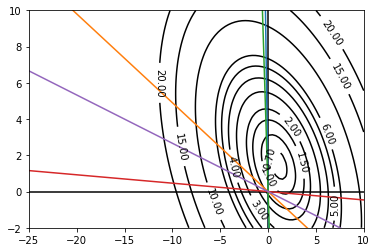

In [5]:
# draw figure
xlim_l = -25
xlim_u = 10
ylim_l = -2
ylim_u = 10

xpoints = np.linspace(xlim_l, xlim_u, 100)
ypoints = np.linspace(ylim_l, ylim_u, 100)

# draw Linear loss landscape
fig = plt.figure()
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)

plt.plot(xpoints, np.zeros_like(xpoints), color='k') # x-axis
plt.plot(np.zeros_like(ypoints), ypoints, color='k') # y-axis

# draw hyperplanes
for i in range(n):
    plt.plot(xpoints, - X[i][0]/X[i][1] * xpoints)

# draw level curve of Loss
Xpoints, Ypoints = np.meshgrid(xpoints, ypoints)
loss = 0
for i in range(n):
    loss += 0.5 /n * (X[i][0]*Xpoints + X[i][1]*Ypoints - Y[i]) ** 2


contour = plt.contour(Xpoints, Ypoints, loss, levels=[0.48, 0.52, 0.6, 0.7, 1, 1.5, 2, 3, 4, 5, 6, 10, 15, 20], 
                      colors='k')
plt.clabel(contour, inline=True, fontsize=10,  colors='black', fmt='%1.2f')
# plt.title('Loss Level Curve')

savefig(f'{output_path}/LinearLevelCurve.png')

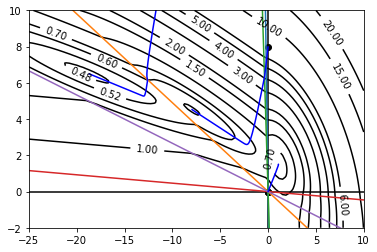

In [6]:
# draw figure
xlim_l = -25
xlim_u = 10
ylim_l = -2
ylim_u = 10

xpoints = np.linspace(xlim_l, xlim_u, 100)
ypoints = np.linspace(ylim_l, ylim_u, 100)

# draw ReLU loss landscape
fig = plt.figure()
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)

plt.plot(xpoints, np.zeros_like(xpoints), color='k') # x-axis
plt.plot(np.zeros_like(ypoints), ypoints, color='k') # y-axis

# draw hyperplanes
for i in range(n):
    plt.plot(xpoints, - X[i][0]/X[i][1] * xpoints)

# draw level curve of Loss
Xpoints, Ypoints = np.meshgrid(xpoints, ypoints)
loss = 0
for i in range(n):
    loss += 0.5 /n * ( np.maximum(X[i][0]*Xpoints + X[i][1]*Ypoints, np.zeros_like(Xpoints)) - Y[i]) **2


contour = plt.contour(Xpoints, Ypoints, loss, levels=[0.48, 0.52, 0.6, 0.7, 1, 1.5, 2, 3, 4, 5, 6, 10, 15, 20], 
                      colors='k')
plt.clabel(contour, inline=True, fontsize=10,  colors='black', fmt='%1.2f')
# plt.title('Loss Level Curve')

# Gradient Flow
plt.plot(relu_tr[:,0], relu_tr[:,1], color='blue')
plt.scatter([0., 0.],[0., 0.], color='black')
plt.plot(relu_tr2[:,0], relu_tr2[:,1], color='blue')
plt.scatter([0., 0.],[0., 8.], color='black')
plt.plot(relu_tr3[:,0], relu_tr3[:,1], color='blue')
plt.scatter([0., 0.],[0., 45.], color='black')


savefig(f'{output_path}/ReLULevelCurvewithGF{Epochs}.png')